In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()
from sklearn.model_selection import train_test_split

import io

Saving housing.csv to housing.csv


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
#checking the null values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [17]:
median_total_bedrooms=435.00
#checking number of rows containing zero value
for i in df.columns:
    print("The number of rows containing zero value for",i,"=",(df[i] == 0).sum())

The number of rows containing zero value for longitude = 0
The number of rows containing zero value for latitude = 0
The number of rows containing zero value for housing_median_age = 0
The number of rows containing zero value for total_rooms = 0
The number of rows containing zero value for total_bedrooms = 0
The number of rows containing zero value for population = 0
The number of rows containing zero value for households = 0
The number of rows containing zero value for median_income = 0
The number of rows containing zero value for median_house_value = 0
The number of rows containing zero value for ocean_proximity = 0


In [18]:


df = df.fillna(median_total_bedrooms)
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


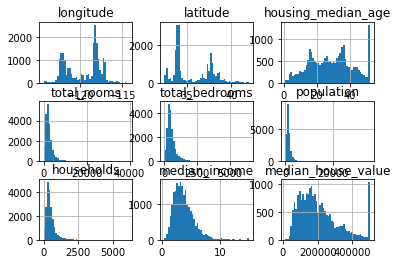

In [9]:
hist = df.hist(bins=50)

In [20]:
#One hot encoding
df = pd.get_dummies(df)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [21]:
#creating new attribute so that we can have better model with better features

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"] = df["population"]/df["households"]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,0.219892,2.123209


In [22]:
#dropping the features with high colearnity 
df = df.drop(["households","total_bedrooms","population"],axis=1)
df


,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,0,0,0,1,0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,1.5603,78100.0,0,1,0,0,0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,2.5568,77100.0,0,1,0,0,0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,1.7000,92300.0,0,1,0,0,0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,1.8672,84700.0,0,1,0,0,0,5.329513,0.219892,2.123209


In [23]:
#train test split
X = df.drop("median_house_value",axis=1)
y = df["median_house_value"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20)
df

,longitude,latitude,housing_median_age,total_rooms,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,8.3252,452600.0,0,0,0,1,0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,7.2574,352100.0,0,0,0,1,0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,5.6431,341300.0,0,0,0,1,0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,3.8462,342200.0,0,0,0,1,0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,1.5603,78100.0,0,1,0,0,0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,2.5568,77100.0,0,1,0,0,0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,1.7000,92300.0,0,1,0,0,0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,1.8672,84700.0,0,1,0,0,0,5.329513,0.219892,2.123209


In [48]:
#linear regression  without k folds 
pipe = Pipeline((
("pt",PowerTransformer()),
("sc",StandardScaler()),
("lr",LinearRegression()),
))

pipe.fit(Xtrain,ytrain)

print("Train accuracy:" ,pipe.score(Xtrain,ytrain)*100)
print("Test accuracy:" ,pipe.score(Xtest,ytest)*100)



Train accuracy: 62.06636476939003
Test accuracy: 60.86503278790485


In [25]:
# checking null values in X

X.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
median_income                 0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
rooms_per_household           0
bedrooms_per_room             0
population_per_household      0
dtype: int64

In [26]:
# checking zero values in X

for i in X.columns:
    print("The number of rows containing zero value for",i,"=",(X[i] == 0).sum())

The number of rows containing zero value for longitude = 0
The number of rows containing zero value for latitude = 0
The number of rows containing zero value for housing_median_age = 0
The number of rows containing zero value for total_rooms = 0
The number of rows containing zero value for median_income = 0
The number of rows containing zero value for ocean_proximity_<1H OCEAN = 11504
The number of rows containing zero value for ocean_proximity_INLAND = 14089
The number of rows containing zero value for ocean_proximity_ISLAND = 20635
The number of rows containing zero value for ocean_proximity_NEAR BAY = 18350
The number of rows containing zero value for ocean_proximity_NEAR OCEAN = 17982
The number of rows containing zero value for rooms_per_household = 0
The number of rows containing zero value for bedrooms_per_room = 0
The number of rows containing zero value for population_per_household = 0


In [38]:
# linear regression using 10 folds 

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)
Train_accuracy = []
Test_accuracy = []

for train_index, test_index in kf.split(X):
  pipe = Pipeline((
  ('lr',LinearRegression()),
  ))
     
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  pipe.fit(X_train,y_train)

  train_accuracy = pipe.score(Xtrain,ytrain)
  test_accuracy = pipe.score(Xtest,ytest)
                             
  Train_accuracy.append(train_accuracy)
  Test_accuracy.append(test_accuracy)

  print('train_accuracy: ', train_accuracy*100)
  print('test_accuracy: ', test_accuracy*100)
  print("------------------------------------------")
  
print( 'average train accuracy:', np.mean(Train_accuracy)*100)
print('average test accuracy:',np.mean(Test_accuracy)*100)
  

train_accuracy:  60.18687795408171
test_accuracy:  59.82342628450941
------------------------------------------
train_accuracy:  61.86696503899238
test_accuracy:  62.28049120850399
------------------------------------------
train_accuracy:  61.94109053474698
test_accuracy:  61.94816740506588
------------------------------------------
train_accuracy:  61.90213499977624
test_accuracy:  62.12780219823164
------------------------------------------
train_accuracy:  61.95459191652128
test_accuracy:  62.10538052147307
------------------------------------------
train_accuracy:  61.98807495949254
test_accuracy:  62.397247826568815
------------------------------------------
train_accuracy:  62.002785877680026
test_accuracy:  62.32679929654601
------------------------------------------
train_accuracy:  61.43037345169806
test_accuracy:  61.60218505429371
------------------------------------------
train_accuracy:  61.94489530722215
test_accuracy:  62.21391968640021
---------------------------------

In [39]:
# 10 folds random forest regressor algorithm 

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)
Train_accuracy = []
Test_accuracy = []

from sklearn.ensemble import RandomForestRegressor

for train_index, test_index in kf.split(X):
  pipe = Pipeline((
  ('rfr',RandomForestRegressor()),
  ))
     
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  pipe.fit(X_train,y_train)

  train_accuracy = pipe.score(Xtrain,ytrain)
  test_accuracy = pipe.score(Xtest,ytest)
                             
  Train_accuracy.append(train_accuracy)
  Test_accuracy.append(test_accuracy)

  print('train_accuracy: ', train_accuracy*100)
  print('test_accuracy: ', test_accuracy*100)
  print("------------------------------------------")

 

print( 'average train accuracy:', np.mean(Train_accuracy)*100)
print('average test accuracy:',np.mean(Test_accuracy)*100)
  

train_accuracy:  90.54235236995058
test_accuracy:  89.7390618824748
------------------------------------------
train_accuracy:  95.96386116570882
test_accuracy:  96.07807785056582
------------------------------------------
train_accuracy:  94.5917084930968
test_accuracy:  94.78673665585042
------------------------------------------
train_accuracy:  95.29142872540906
test_accuracy:  95.2612592421319
------------------------------------------
train_accuracy:  95.03920050915288
test_accuracy:  94.81956331228817
------------------------------------------
train_accuracy:  95.12909935538043
test_accuracy:  95.40630933065286
------------------------------------------
train_accuracy:  95.98873402281114
test_accuracy:  96.11956301600259
------------------------------------------
train_accuracy:  93.11655509062791
test_accuracy:  93.18842438843487
------------------------------------------
train_accuracy:  93.72402827927317
test_accuracy:  93.98223956694684
--------------------------------------

In [42]:
# 10 folds decision tree regressor algorithm 

from sklearn.model_selection import KFold

kf = KFold(n_splits=10)
kf.get_n_splits(X)
Train_accuracy = []
Test_accuracy = []

from sklearn.tree import DecisionTreeRegressor

for train_index, test_index in kf.split(X):
  pipe = Pipeline((
  ('dtr',DecisionTreeRegressor()),
  ))
     
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  pipe.fit(X_train,y_train)

  train_accuracy = pipe.score(Xtrain,ytrain)
  test_accuracy = pipe.score(Xtest,ytest)
                             
  Train_accuracy.append(train_accuracy)
  Test_accuracy.append(test_accuracy)

  print('train_accuracy: ', train_accuracy*100)
  print('test_accuracy: ', test_accuracy*100)
  print("------------------------------------------")

 

print( 'average train accuracy:', np.mean(Train_accuracy)*100)
print('average test accuracy:',np.mean(Test_accuracy)*100)

train_accuracy:  89.8031535872065
test_accuracy:  86.85277269708413
------------------------------------------
train_accuracy:  95.94008536507219
test_accuracy:  96.2419802049554
------------------------------------------
train_accuracy:  94.74717077938001
test_accuracy:  94.99193579477283
------------------------------------------
train_accuracy:  95.84557008597183
test_accuracy:  95.92122151212268
------------------------------------------
train_accuracy:  93.80602599963575
test_accuracy:  93.39343471496812
------------------------------------------
train_accuracy:  95.19813494525907
test_accuracy:  95.91619184899989
------------------------------------------
train_accuracy:  96.51011521532368
test_accuracy:  96.80608282769228
------------------------------------------
train_accuracy:  92.48859556645581
test_accuracy:  91.96370470803805
------------------------------------------
train_accuracy:  93.10595978138508
test_accuracy:  93.86140706262994
-------------------------------------

In [ ]:
#
# 
#  for polynomial regression and support vector machine algorithm shown below
# i used predict in place of pipe.score because pipe is not working properly.
#
#

In [43]:
# 10 folds polynomial regression algorithm 

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kf.get_n_splits(X)
train_ac = []
test_ac = []

for train_index, test_index in kf.split(X):
   
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ("py",PolynomialFeatures(4)),
    ("lr",LinearRegression()),
    ))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1
        testac = correct/total
    
    trainac = correct1/total1
    print("train efficiency:",trainac*100)
    print("test efficiency:",testac*100)
    print("------------------------------------------")
    
    test_ac.append(testac)
    train_ac.append(trainac)


print("average train accuracy:" ,np.mean(train_ac)*100)
print("average test accuracy:" ,np.mean(test_ac)*100)

train efficiency: 66.89814814814815
test efficiency: 37.3062015503876
------------------------------------------
train efficiency: 67.58182601205857
test efficiency: 43.9437984496124
------------------------------------------
train efficiency: 67.9801894918174
test efficiency: 54.21511627906976
------------------------------------------
train efficiency: 67.01119724375538
test efficiency: 61.87015503875969
------------------------------------------
train efficiency: 67.26421188630492
test efficiency: 57.65503875968992
------------------------------------------
train efficiency: 67.14039621016366
test efficiency: 62.4031007751938
------------------------------------------
train efficiency: 67.0165805340224
test efficiency: 55.81395348837209
------------------------------------------
train efficiency: 67.33419465977606
test efficiency: 55.281007751937985
------------------------------------------
train efficiency: 66.81739879414297
test efficiency: 54.166666666666664
--------------------

In [44]:

# 10 fold support vector regression algorithm 

from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X)
train_ac = []
test_ac = []

from sklearn.svm import SVR


for train_index, test_index in kf.split(X):
    pipe = Pipeline((
    ("sc",StandardScaler()),
    ("s", SVR(kernel='linear', C=100, gamma='auto')),
    ))

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipe.fit(X_train,y_train)

    y_poly_pred = pipe.predict(X_test)
    y_pred = pipe.predict(X_train)
    correct =0
    total =0
    correct1 =0
    total1 =0
    for x in range(len(y_poly_pred)):
      total =total +1
      if ((y_test.iloc[x]+y_test.iloc[x]/5)>=y_poly_pred[x]) and ((y_test.iloc[x]-y_test.iloc[x]/5)<=y_poly_pred[x]):
        correct = correct +1

    for x in range(len(y_pred)):
      total1 =total1 +1
      if ((y_train.iloc[x]+y_train.iloc[x]/5)>=y_pred[x]) and ((y_train.iloc[x]-y_train.iloc[x]/5)<=y_pred[x]):
        correct1 = correct1 +1

    testac = correct/total
    trainac = correct1/total1
    print("test efficiency:",testac*100)
    print("train efficiency:",trainac*100)
    print("------------------------------------------")
    test_ac.append(testac)
    train_ac.append(trainac)


print("average train accuracy:" ,np.mean(train_ac)*100)
print("average test accuracy:" ,np.mean(test_ac)*100)

test efficiency: 50.1937984496124
train efficiency: 50.511412575366066
------------------------------------------
test efficiency: 50.33914728682171
train efficiency: 49.989233419465975
------------------------------------------
test efficiency: 50.72674418604651
train efficiency: 49.99461670973299
------------------------------------------
test efficiency: 51.11434108527132
train efficiency: 49.88695090439276
------------------------------------------
test efficiency: 49.46705426356589
train efficiency: 50.086132644272176
------------------------------------------
test efficiency: 49.854651162790695
train efficiency: 49.973083548664945
------------------------------------------
test efficiency: 50.1937984496124
train efficiency: 50.086132644272176
------------------------------------------
test efficiency: 49.224806201550386
train efficiency: 50.032299741602074
------------------------------------------
test efficiency: 49.224806201550386
train efficiency: 49.96231696813092
----------

In [ ]:
#
#
# after this any algorithm is not from the assignment, i just used to see the accuracy 
#
#

In [46]:
#Gradient Boosting Regressor without any hyperparameter tuning

from sklearn.ensemble import GradientBoostingRegressor

pipe = Pipeline((
("pt",PowerTransformer()),
("py",PolynomialFeatures(2)),
("sc",StandardScaler()),
("gb",GradientBoostingRegressor()),
))

pipe.fit(Xtrain,ytrain)
print("Train accuracy:" ,pipe.score(Xtrain,ytrain)*100)
print("Test accuracy:" ,pipe.score(Xtest,ytest)*100)


Train accuracy: 81.94914216868521
Test accuracy: 80.11130405758405


In [49]:
#Gradient Boosting Regressor with hyperparameter tuning

pipe = Pipeline((
("py",PolynomialFeatures(2)),
("sc",StandardScaler()),
("gb",GradientBoostingRegressor(learning_rate=0.1,n_estimators=300,min_samples_split=20, min_samples_leaf=10, max_depth=6)),
))

pipe.fit(Xtrain,ytrain)
print("Train accuracy:" ,pipe.score(Xtrain,ytrain)*100)
print("Test accuracy:" ,pipe.score(Xtest,ytest)*100)



Train accuracy: 94.92274457774616
Test accuracy: 85.08529542069331


In [51]:
#XGB


from xgboost import XGBClassifier,XGBRegressor

pipe = Pipeline((
("pt",PowerTransformer()),
("py",PolynomialFeatures(2)),
("sc",StandardScaler()),
("xgb",XGBRegressor()),
))

pipe.fit(Xtrain,ytrain)
print("Train accuracy:" ,pipe.score(Xtrain,ytrain)*100)
print("Test accuracy:" ,pipe.score(Xtest,ytest)*100)


[04:32:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train accuracy: 82.01028372165594
Test accuracy: 80.1546016083873
